In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Veriyi yükleme
data = pd.read_csv(r"data.csv")

# Görüntüleri yükleme ve işlemleme
height, width = 128, 128
X = np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img = load_img(r"{}/{}.jpg".format(data.loc[i, 'label'], data.loc[i, 'images_id']), target_size=(height, width))
    X[i] = img_to_array(img)

# Etiketleri işlemleme
labels = data.label.unique()
labels = {labels[i]: i for i in range(labels.size)}

def changeLabels(x):
    return labels[x]

y = data.label.apply(changeLabels)
y = to_categorical(y, len(labels))
y = y.astype(int)

# Veriyi eğitim, doğrulama ve test setlerine bölme
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=8)

# Model oluşturma fonksiyonu
def create_model(activation):
    model = Sequential()
    model.add(Input(shape=(height, width, 3)))
    model.add(Conv2D(64, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dropout(0.45))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Aktivasyon fonksiyonlarının listesi
activations = ['sigmoid', 'relu', 'tanh', 'swish', 'elu', 'selu']

In [8]:
# Eğitim sonuçlarını saklamak için dictionary
results = {}

EPOCHS = 15

# Modelleri eğitme ve sonuçları saklama
for activation in activations:
    print(f"Training with {activation} activation function...")
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=0)
    results[activation] = history.history

Training with sigmoid activation function...
Training with relu activation function...
Training with tanh activation function...
Training with swish activation function...
Training with elu activation function...
Training with selu activation function...


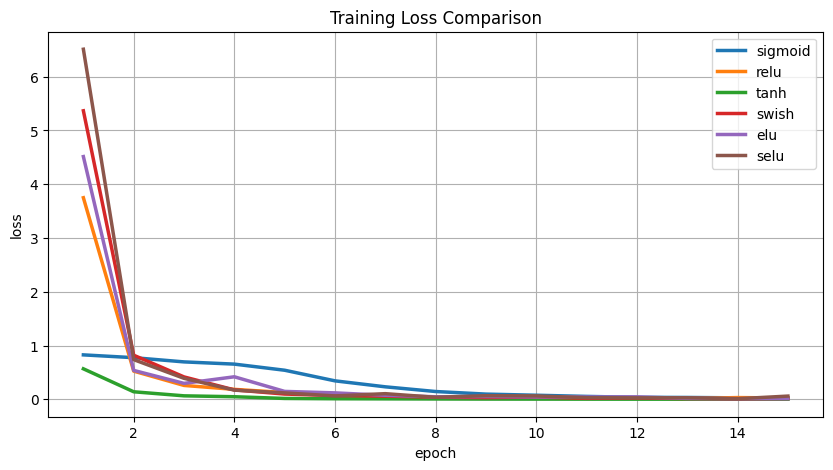

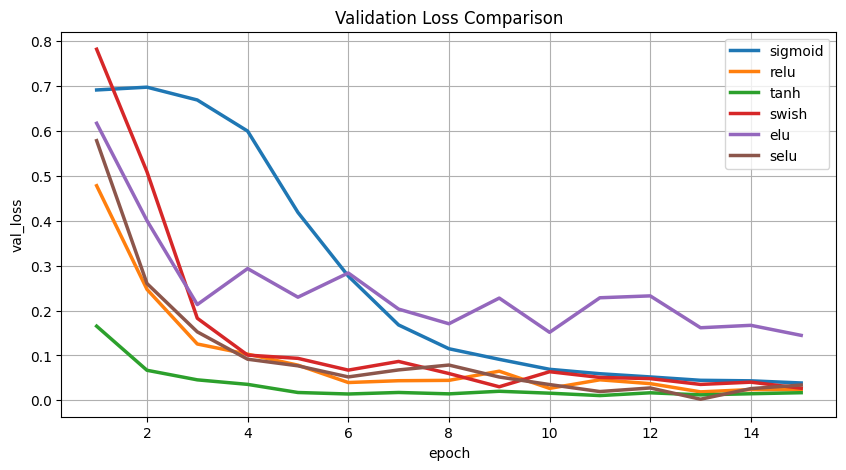

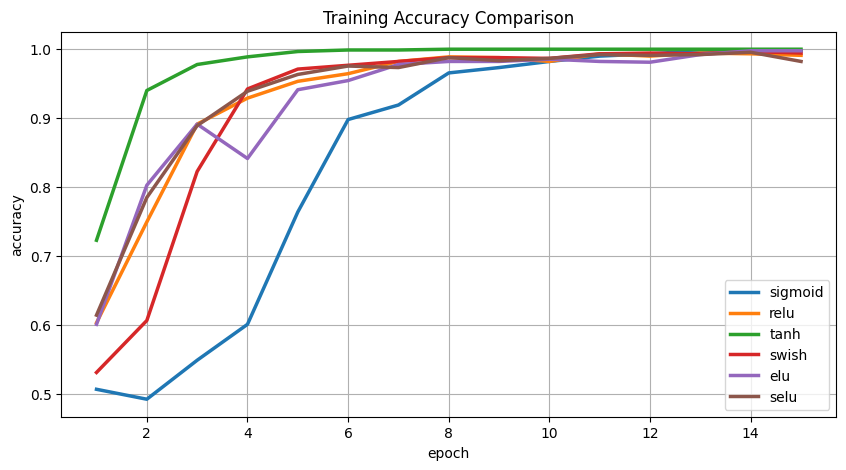

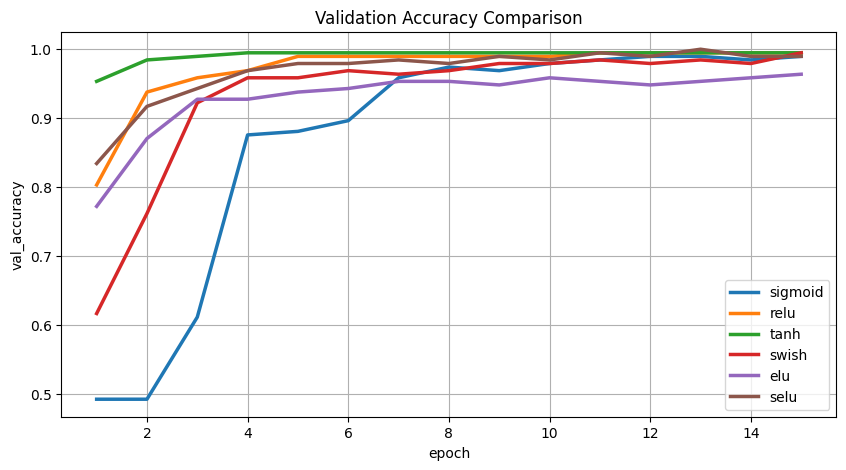

In [16]:
# Sonuçları görselleştirme
stats_df = pd.DataFrame()
for activation, history in results.items():
    temp_df = pd.DataFrame(history)
    temp_df['epoch'] = range(1, EPOCHS + 1)
    temp_df['activation'] = activation
    stats_df = pd.concat([stats_df, temp_df])

plt.figure(figsize=(10, 5))
sns.lineplot(data=stats_df, x='epoch', y='loss', hue='activation', linewidth=2.5)
plt.title("Training Loss Comparison")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=stats_df, x='epoch', y='val_loss', hue='activation', linewidth=2.5)
plt.title("Validation Loss Comparison")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=stats_df, x='epoch', y='accuracy', hue='activation', linewidth=2.5)
plt.title("Training Accuracy Comparison")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=stats_df, x='epoch', y='val_accuracy', hue='activation', linewidth=2.5)
plt.title("Validation Accuracy Comparison")
plt.grid()
plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Veriyi yükleme
data = pd.read_csv(r"data.csv")

# Görüntüleri yükleme ve işlemleme
height, width = 128, 128
X = np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img = load_img(r"{}/{}.jpg".format(data.loc[i, 'label'], data.loc[i, 'images_id']), target_size=(height, width))
    X[i] = img_to_array(img)

# Etiketleri işlemleme
labels = data.label.unique()
labels = {labels[i]: i for i in range(labels.size)}

def changeLabels(x):
    return labels[x]

y = data.label.apply(changeLabels)
y = to_categorical(y, len(labels))
y = y.astype(int)

# Veriyi eğitim, doğrulama ve test setlerine bölme
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=8)

# Model oluşturma fonksiyonu
def create_model(activation):
    model = Sequential()
    model.add(Input(shape=(height, width, 3)))
    model.add(Conv2D(64, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation=activation))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dropout(0.45))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Aktivasyon fonksiyonlarının listesi
activations = ['sigmoid', 'relu', 'tanh', 'swish', 'elu', 'selu']

In [4]:
# Eğitim sonuçlarını saklamak için dictionary
results = {}

EPOCHS = 15

test_results = {}

for activation in activations:
    print(f"Training with {activation} activation function...")
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=0)
    results[activation] = history.history
    loss, accuracy = model.evaluate(X_test, y_test)
    test_results[activation] = {'loss': loss, 'accuracy': accuracy}

test_results_df = pd.DataFrame(test_results).transpose()
print(test_results_df)


Training with sigmoid activation function...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9864 - loss: 0.0533
Training with relu activation function...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9521 - loss: 0.1757
Training with tanh activation function...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9891 - loss: 0.0144
Training with swish activation function...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9864 - loss: 0.0670
Training with elu activation function...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9818 - loss: 0.0619
Training with selu activation function...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9845 - loss: 0.1105
             loss  accuracy
sigmoid  0.037209  0.989691
relu     0.123212  0.963918
tanh     0.007821  0.994845
swish    0.055535  0.989691
elu      0.056190  0.979381
selu     0.078782  0.984536


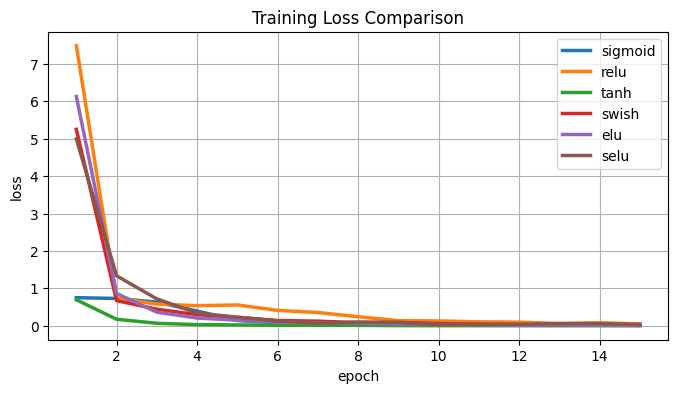

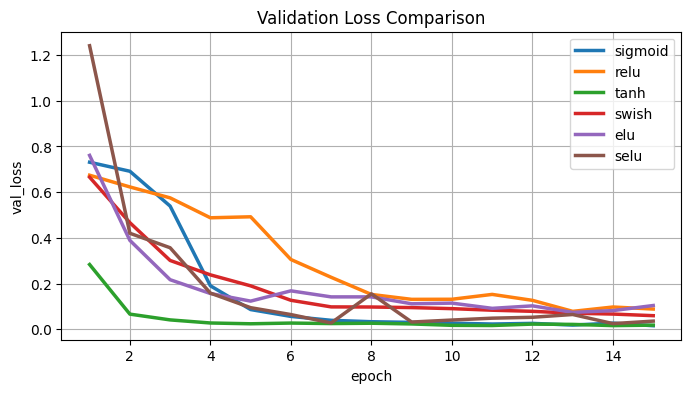

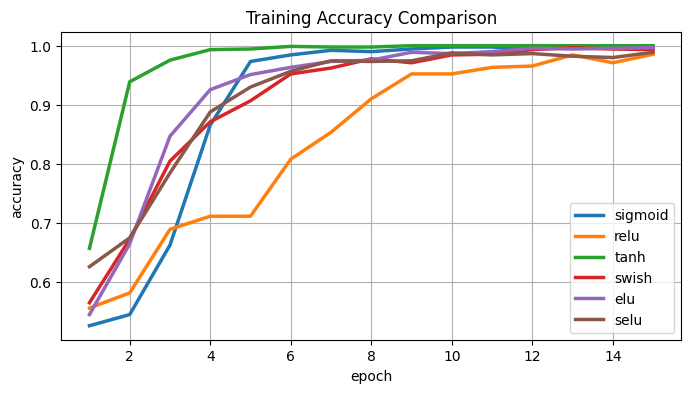

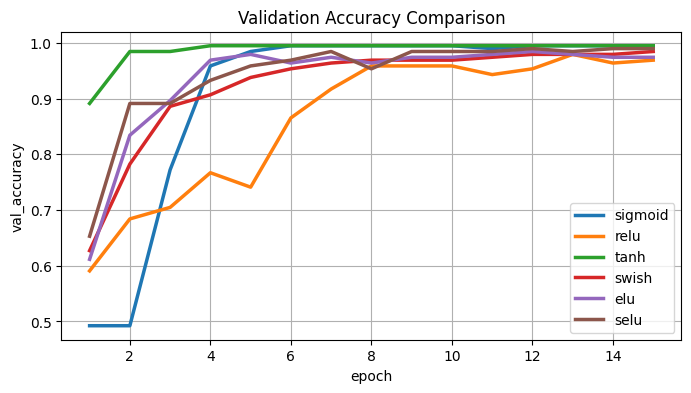

In [5]:
# Sonuçları görselleştirme
stats_df = pd.DataFrame()
for activation, history in results.items():
    temp_df = pd.DataFrame(history)
    temp_df['epoch'] = range(1, EPOCHS + 1)
    temp_df['activation'] = activation
    stats_df = pd.concat([stats_df, temp_df])

plt.figure(figsize=(8, 4))
sns.lineplot(data=stats_df, x='epoch', y='loss', hue='activation', linewidth=2.5)
plt.title("Training Loss Comparison")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(data=stats_df, x='epoch', y='val_loss', hue='activation', linewidth=2.5)
plt.title("Validation Loss Comparison")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(data=stats_df, x='epoch', y='accuracy', hue='activation', linewidth=2.5)
plt.title("Training Accuracy Comparison")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(data=stats_df, x='epoch', y='val_accuracy', hue='activation', linewidth=2.5)
plt.title("Validation Accuracy Comparison")
plt.grid()
plt.legend()
plt.show()